<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Vadere" data-toc-modified-id="Vadere-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vadere</a></span></li><li><span><a href="#Experiment" data-toc-modified-id="Experiment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Experiment</a></span></li></ul></div>

In [6]:
import numpy as np
import pandas as pd
import scipy.spatial as spatial
import matplotlib.pyplot as plt
import matplotlib.path as path
import matplotlib as mpl
import os
import sys
import vadereanalysistool
from tqdm import tqdm_notebook
from shapely.geometry import Polygon, MultiPolygon, Point

module_path = os.path.abspath(os.path.join('../python/python_src_preprocessing/src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils.reader import get_all_trajectory_files, read_trajectory_file

%load_ext autoreload
%autoreload 1
%aimport voronoi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Vadere

In [7]:
project = vadereanalysistool.VadereProject('../../../VadereModelTests/TestCWL/')
scenarios = list(filter(lambda x: not x.startswith('__'), dir(project.named_output)))

loaded 11 out of 11 output directories. 


In [8]:
force = True

100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [03:11<00:00,  1.17it/s]


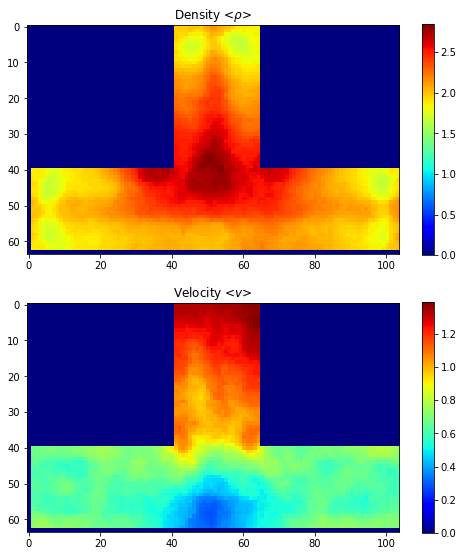

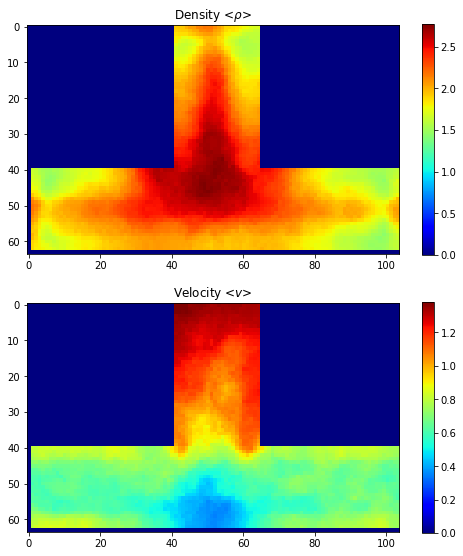

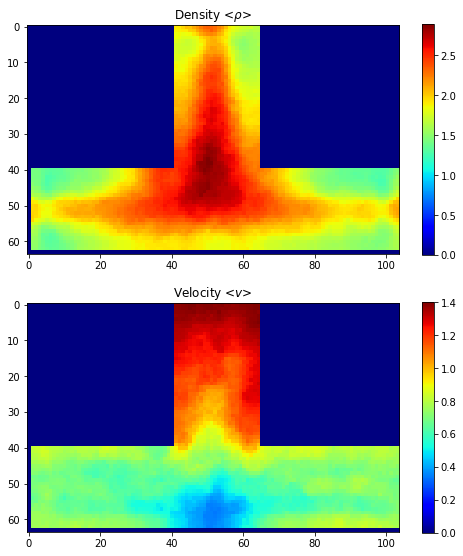

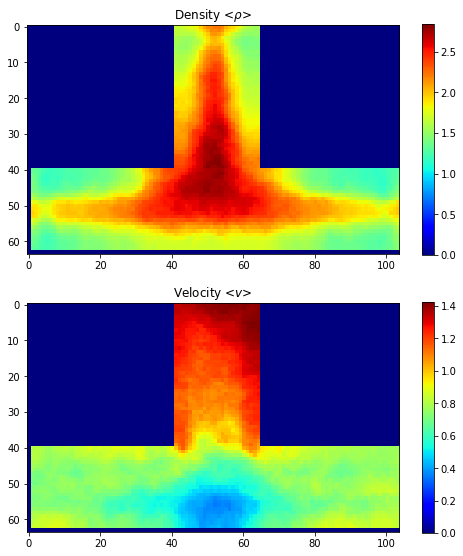

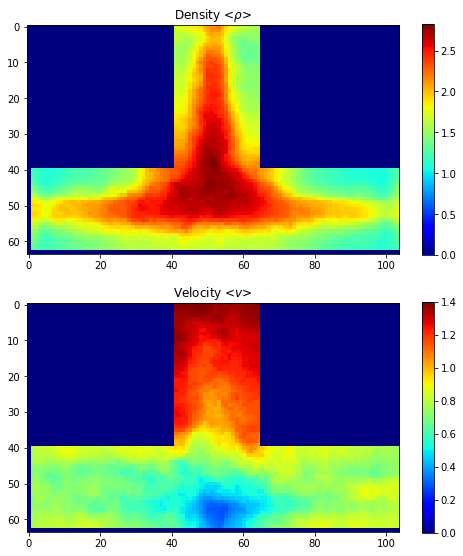

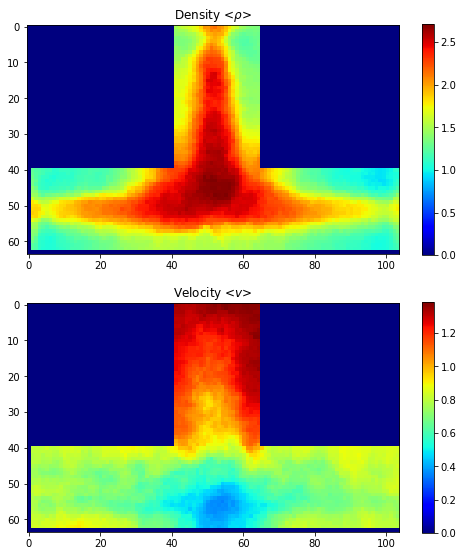

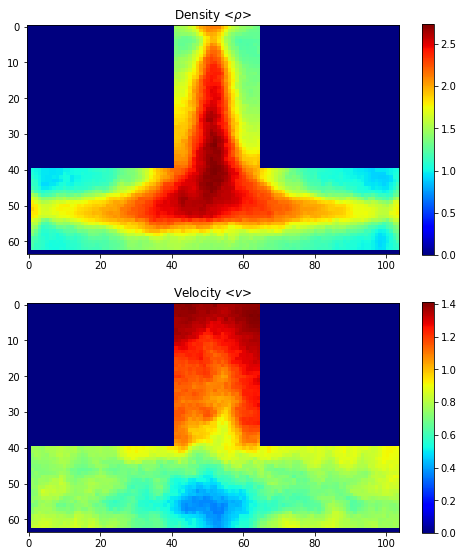

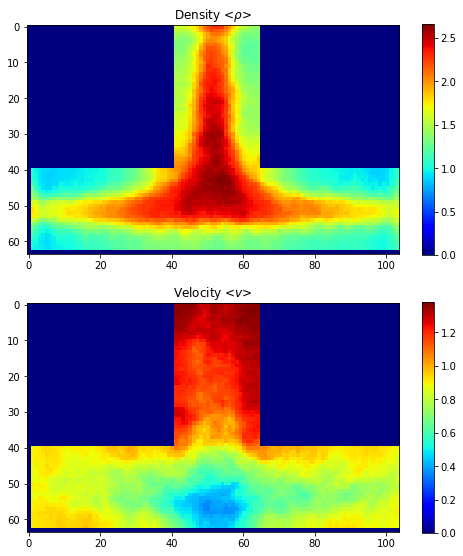

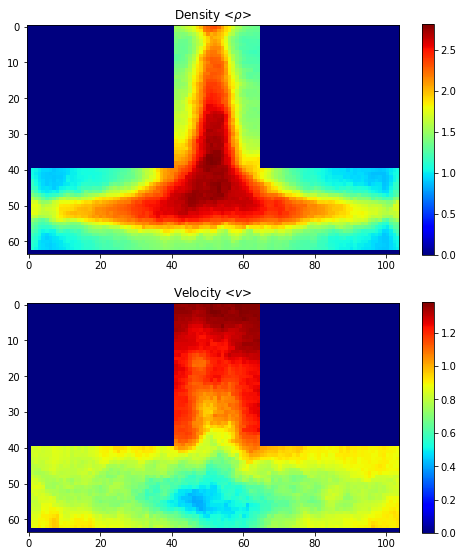

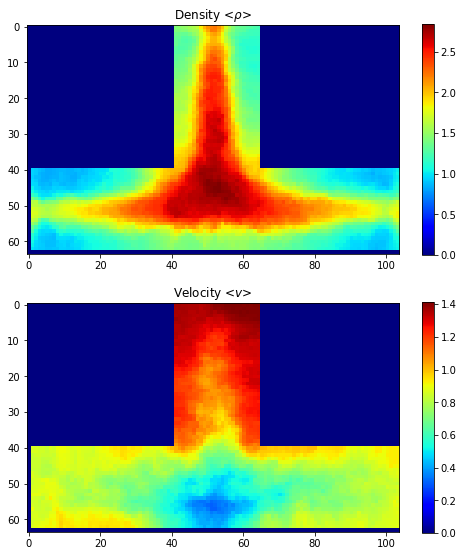

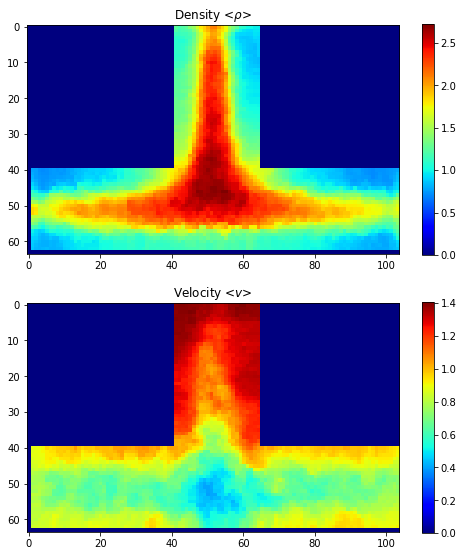

In [9]:
for scenario in scenarios:
    output = getattr(project.named_output, scenario)()
    
    D, V = (None, None)
    
    if force or not (os.path.isfile(os.path.join(output.output_dir, 'density.npy')) and os.path.isfile(os.path.join(output.output_dir, 'density.npy'))):    
        df = output.named_files.df_postvis_trajectories()
        D, V = voronoi.run(
            df,
            dict({
                'area': [14.5, 1.3, 10.4, 6.4],
                'boundary': Polygon([[14.5, 1.3], [14.5, 3.7], [18.5, 3.7], [18.5, 7.7], [20.9, 7.7], [20.9, 3.7], [24.9, 3.7], [24.9, 1.3]]),
                'skip': 5
            }), 
            nprocesses=3
        )
        np.save(os.path.join(output.output_dir, 'density.npy'), D)
        np.save(os.path.join(output.output_dir, 'velocity.npy'), V)
    
    if D is None:
        D = np.load(os.path.join(output.output_dir, 'density.npy'))
        V = np.load(os.path.join(output.output_dir, 'density.npy'))
    
    fig, pl = plt.subplots(nrows=2, ncols=1, figsize=(800 / 96, 900 / 96))

    img = pl[0].imshow(D, cmap='jet')
    pl[0].set_title("Density <$\\rho$>")
    fig.colorbar(img, ax=pl[0])

    img = pl[1].imshow(V, cmap='jet')
    pl[1].set_title("Velocity <$v$>")
    fig.colorbar(img, ax=pl[1])

    fig.savefig(output.output_dir_name + '.pdf')

# Experiment

In [ ]:
B = voronoi.run(
    df, 
    [14.5, 1.3, 10.4, 6.4], 
    Polygon([[14.5, 1.3], [14.5, 3.7], [18.5, 3.7], [18.5, 7.7], [20.9, 7.7], [20.9, 3.7], [24.9, 3.7], [24.9, 1.3]])
)

In [ ]:
xdim = round(10.4 / 0.1)
ydim = round(6.4 / 0.1)
    
fig, pl = plt.subplots()
img = pl.imshow(np.flipud(A.reshape((ydim, xdim))), cmap='jet')
fig.colorbar(img)
fig.savefig('density-vadere-240-240-240.pdf')